### In this project the scope being the same,i tuned in the model by increasing the Filters in the convolutional layer and decreasing the batch to 20.

### Also i have changed the input size to 300*300,that has impacted the training in terms of time needed to complete 1 epoch i.e it has increased the computatiinal time

#### Also added the vertical and horizontal flip to add up image augmentation.

#### In this model,it is observed that,by setting the input size of 300 * 300,i.e the bigger the input shape,there is considerable increase in the training time and and also there was improvement in the accuracy.

In [1]:
import os

In [2]:
# This defines the directory with the training products pictures
train_Sneakers_dir = os.path.join('C:/Users/Bhavesh/Desktop/Fashion Classifier/Train/1')

train_Womens_Footwear_dir = os.path.join('C:/Users/Bhavesh/Desktop/Fashion Classifier/Train/2')

train_T_Shirts_dir = os.path.join('C:/Users/Bhavesh/Desktop/Fashion Classifier/Train/3')

train_Womens_Clothing_dir = os.path.join('C:/Users/Bhavesh/Desktop/Fashion Classifier/Train/4')

train_Eyeglasses_dir = os.path.join('C:/Users/Bhavesh/Desktop/Fashion Classifier/Train/5')

In [3]:
train_Sneakers_names = os.listdir(train_Sneakers_dir)
train_Womens_Footwear_names = os.listdir(train_Womens_Footwear_dir)
train_T_Shirts_names = os.listdir(train_T_Shirts_dir)
train_Womens_Clothing_names = os.listdir(train_Womens_Clothing_dir)
train_Eyeglasses_names = os.listdir(train_Eyeglasses_dir)

# To check the names of items in the directory
print(train_Sneakers_names[:5])
print(train_Womens_Footwear_names[:5])
print(train_T_Shirts_names[:5])
print(train_Womens_Clothing_names[:5])
print(train_Eyeglasses_names[:5])

In [4]:
# we confirm the total number of items in the list by calling on the len function
print('total training Sneakers images:', len(os.listdir(train_Sneakers_dir)))
print('total training Womens Footwear images:', len(os.listdir(train_Womens_Footwear_dir)))
print('total training T-Shirts images:', len(os.listdir(train_T_Shirts_dir)))
print('total training Womens Clothing images:', len(os.listdir(train_Womens_Clothing_dir)))
print('total training Eyeglasses images:', len(os.listdir(train_Eyeglasses_dir)))

In [5]:
# We visually inspect the random images in the train folder for all 5 classes
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 14
ncols = 4

# Index for iterating over images
pic_index = 0

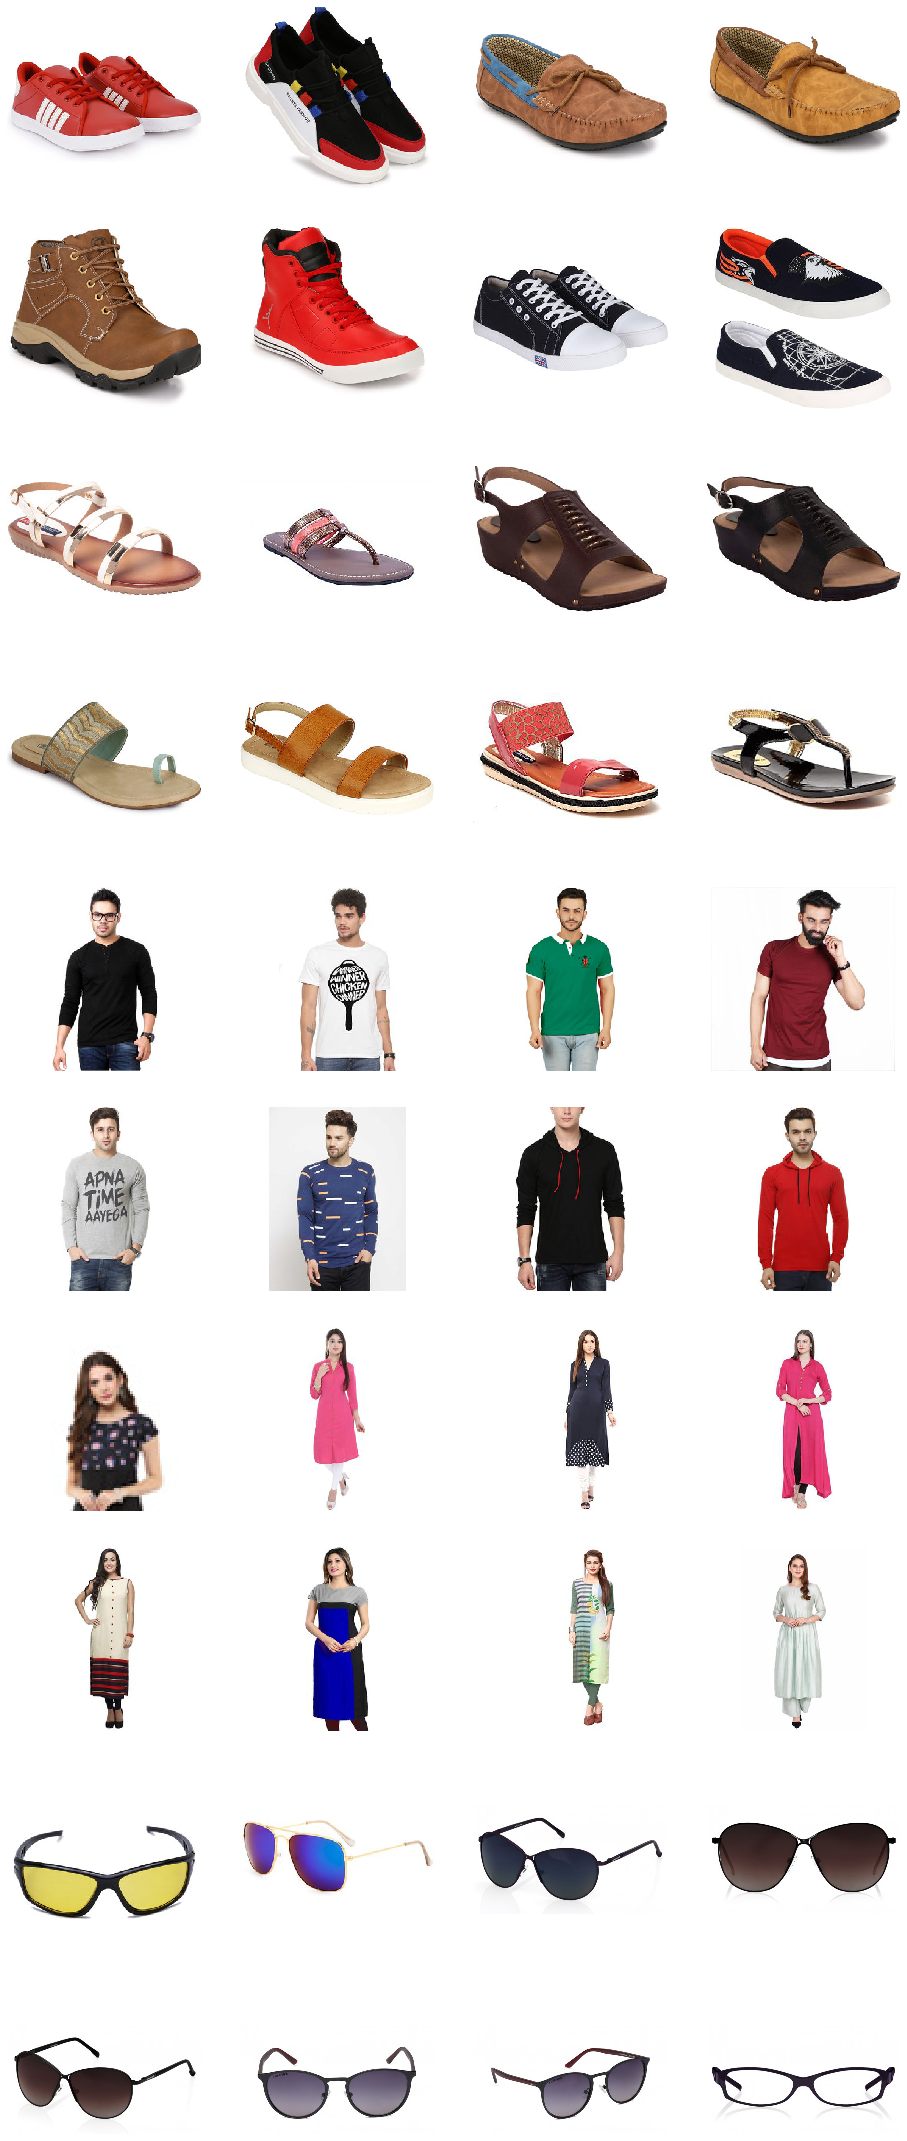

In [6]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_Sneakers_pix = [os.path.join(train_Sneakers_dir, fname) 
                for fname in train_Sneakers_names[pic_index-8:pic_index]]
next_Womens_Footwear_pix = [os.path.join(train_Womens_Footwear_dir, fname) 
                for fname in train_Womens_Footwear_names[pic_index-8:pic_index]]
next_T_Shirts_pix = [os.path.join(train_T_Shirts_dir, fname) 
                for fname in train_T_Shirts_names[pic_index-8:pic_index]]
next_Womens_Clothing_pix = [os.path.join(train_Womens_Clothing_dir, fname) 
                for fname in train_Womens_Clothing_names[pic_index-8:pic_index]]
next_Eyeglasses_pix = [os.path.join(train_Eyeglasses_dir, fname) 
                for fname in train_Eyeglasses_names[pic_index-8:pic_index]]



for i, img_path in enumerate(next_Sneakers_pix+next_Womens_Footwear_pix+next_T_Shirts_pix+next_Womens_Clothing_pix+next_Eyeglasses_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [7]:
import tensorflow as tf

In [8]:
# Instantiating a callback to end training after the accuarcy of 96% is reached
callback_accuracy = 0.96

class myCallback(tf.keras.callbacks.Callback):
          def on_epoch_end(self, epoch, logs={}):
            if(logs.get('acc')> callback_accuracy):
                  print("\nReached 96% accuracy so cancelling training!")
                  self.model.stop_training = True 

callbacks = myCallback()

In [9]:
# As the training images contains various images of different shape and size,
# we change to a common input shape of 300*300 and use 5 convolutions layers
model = tf.keras.models.Sequential([
    # This is the 1st convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The 2nd convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The 3rd convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The 4th convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The 5th convolution
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # I flatten the images to feed into DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    # As there are 5 types/classes of products,we we take 5 as final dense and
    # activation as softmax,for multiple classification
    tf.keras.layers.Dense(5, activation='softmax')
])

In [10]:
# In the summary ,the number of parameter to train are explored
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 128)       7

In [11]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescaling all images by 1./255
# adding vertical and horizontal flip in this case
train_datagen = ImageDataGenerator(
                rescale=1/255,
                vertical_flip=True,                   
                horizontal_flip=True
                )

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        'C:/Users/Bhavesh/Desktop/Fashion Classifier/Train', #source directory for training images  
        target_size=(300, 300),  # All images will be resized to 300*300
        batch_size=20,
        class_mode ='categorical')
        

Found 2000 images belonging to 5 classes.


In [13]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=5,
      epochs=100,
      verbose=1,
      callbacks=[callbacks])

Epoch 1/100
5/5 [==============================] - 19s 4s/step - loss: 1.9122 - acc: 0.2100
Epoch 2/100
5/5 [==============================] - 18s 4s/step - loss: 1.6093 - acc: 0.2400
Epoch 3/100
5/5 [==============================] - 18s 4s/step - loss: 1.6083 - acc: 0.2100
Epoch 4/100
5/5 [==============================] - 18s 4s/step - loss: 1.6122 - acc: 0.2100
Epoch 5/100
5/5 [==============================] - 18s 4s/step - loss: 1.6013 - acc: 0.3400
Epoch 6/100
5/5 [==============================] - 18s 4s/step - loss: 1.5947 - acc: 0.2800
Epoch 7/100
5/5 [==============================] - 19s 4s/step - loss: 1.5644 - acc: 0.2800
Epoch 8/100
5/5 [==============================] - 18s 4s/step - loss: 1.4755 - acc: 0.3600
Epoch 9/100
5/5 [==============================] - 20s 4s/step - loss: 1.5293 - acc: 0.3700
Epoch 10/100
5/5 [==============================] - 20s 4s/step - loss: 1.5188 - acc: 0.3300
Epoch 11/100
5/5 [==============================] - 19s 4s/step - loss: 1.4844 

In [14]:
# Here we visualize the the training Loss and accuracy with respective to each epoch
import matplotlib.pyplot as plt
acc = history.history['acc']
loss = history.history['loss']

epochs = range(len(acc))

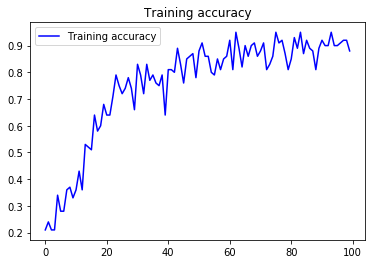

In [15]:
# For Training Accuracy versus Epochs
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.legend()
plt.show()

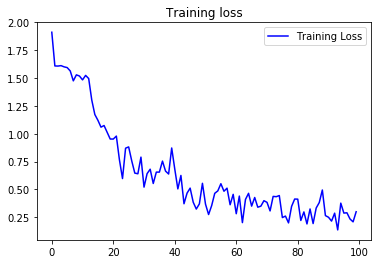

In [16]:
# For Training loss versus Epochs
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

#### We import PIL and Numpy to convert the test/uploaded images into desired shape of array and use vstack (similar to flatten in the training model) to stack the sequence of input arrays vertically to make a single array.

In [17]:
import numpy as np
from keras_preprocessing import image
from PIL import Image

In [18]:
# Defining a function to call for predicting the images
def Fashion_Classifer(Image_Location):

    path = 'C:/Users/Bhavesh/Desktop/Fashion Classifier/Test/Test All/test ({}).jpg'.format(Image_Location)
    #converting the uploaded images or the test images in the input shape of 300
    #so thats compatible with our model
    img = Image.open(path)
    img = image.load_img(path, target_size=(300, 300))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = model.predict(images)
    x = classes
    x = x.ravel()
    y = np.argmax(x)
    if y == 0:
        print('The image uploaded is a Sneaker')
    elif y == 1:
        print('The image uploaded is a Womens footwear')
    elif y == 2:
        print('The image uploaded is a T_Shirts')
    elif y == 3:
        print('The image uploaded is a Womens clothing')
    else:
        print('The image uploaded is a Eyeglass')

In [19]:
# this is the location of images in the folder "Test All" that i have in 
# my dataset
Image_Location_1 = 23

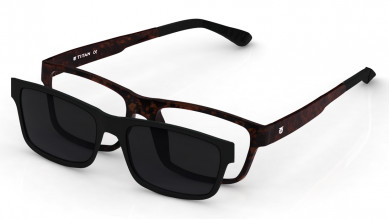

In [20]:
# Visually check the image from the test folder to cross check accuracy 
path = 'C:/Users/Bhavesh/Desktop/Fashion Classifier/Test/Test All/test ({}).jpg'.format(Image_Location_1)
img = Image.open(path)
img

In [21]:
Fashion_Classifer(Image_Location_1)

The image uploaded is a Eyeglass


### As i have 300 images in test folder,i choose to upload images at the index value randomly to avoid any bias in image selection manually.
### I use np.random.randint() to get random value from 1 to 300,and feed it to image_location_2 onwards to get a clear view of the models accuracy

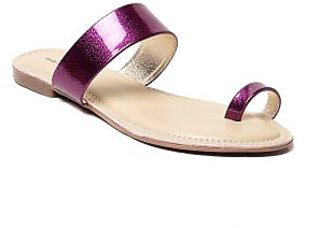

In [22]:
Image_Location_2 = np.random.randint(1,301)
path = 'C:/Users/Bhavesh/Desktop/Fashion Classifier/Test/Test All/test ({}).jpg'.format(Image_Location_2)
img = Image.open(path)
img

In [23]:
Fashion_Classifer(Image_Location_2)

The image uploaded is a Womens footwear


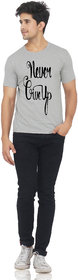

In [24]:
Image_Location_3 = np.random.randint(1,301)
path = 'C:/Users/Bhavesh/Desktop/Fashion Classifier/Test/Test All/test ({}).jpg'.format(Image_Location_3)
img = Image.open(path)
img

In [25]:
Fashion_Classifer(Image_Location_3)

The image uploaded is a T_Shirts


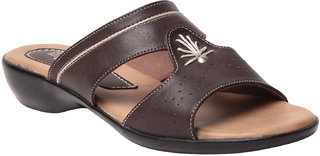

In [26]:
Image_Location_4 = np.random.randint(1,301)
path = 'C:/Users/Bhavesh/Desktop/Fashion Classifier/Test/Test All/test ({}).jpg'.format(Image_Location_4)
img = Image.open(path)
img

In [27]:
Fashion_Classifer(Image_Location_4)

The image uploaded is a Womens footwear


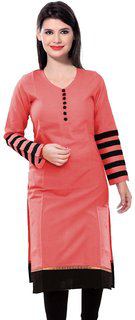

In [28]:
Image_Location_5 = np.random.randint(1,301)
path = 'C:/Users/Bhavesh/Desktop/Fashion Classifier/Test/Test All/test ({}).jpg'.format(Image_Location_5)
img = Image.open(path)
img

In [29]:
Fashion_Classifer(Image_Location_5)

The image uploaded is a Womens clothing


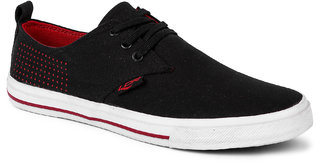

In [30]:
Image_Location_6 = np.random.randint(1,301)
path = 'C:/Users/Bhavesh/Desktop/Fashion Classifier/Test/Test All/test ({}).jpg'.format(Image_Location_6)
img = Image.open(path)
img

In [31]:
Fashion_Classifer(Image_Location_6)

The image uploaded is a Sneaker


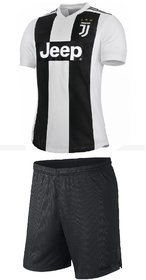

In [32]:
Image_Location_7 = np.random.randint(1,301)
path = 'C:/Users/Bhavesh/Desktop/Fashion Classifier/Test/Test All/test ({}).jpg'.format(Image_Location_7)
img = Image.open(path)
img

In [33]:
Fashion_Classifer(Image_Location_7)

The image uploaded is a T_Shirts


176


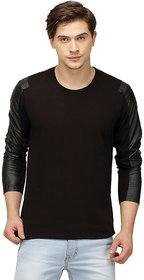

In [34]:
Image_Location_8 = np.random.randint(1,301)
path = 'C:/Users/Bhavesh/Desktop/Fashion Classifier/Test/Test All/test ({}).jpg'.format(Image_Location_8)
img = Image.open(path)
print(Image_Location_8)
img

In [35]:
Fashion_Classifer(Image_Location_8)

The image uploaded is a T_Shirts


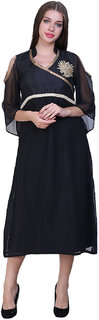

In [36]:
Image_Location_9 = np.random.randint(1,301)
path = 'C:/Users/Bhavesh/Desktop/Fashion Classifier/Test/Test All/test ({}).jpg'.format(Image_Location_9)
img = Image.open(path)
img

In [37]:
Fashion_Classifer(Image_Location_9)

The image uploaded is a Womens clothing


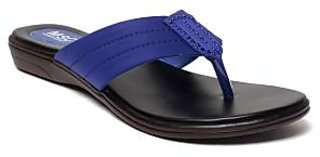

In [38]:
Image_Location_10 = np.random.randint(1,301)
path = 'C:/Users/Bhavesh/Desktop/Fashion Classifier/Test/Test All/test ({}).jpg'.format(Image_Location_10)
img = Image.open(path)
img

In [39]:
Fashion_Classifer(Image_Location_10)

The image uploaded is a Womens footwear


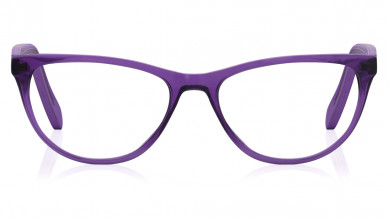

In [40]:
Image_Location_11 = np.random.randint(1,301)
path = 'C:/Users/Bhavesh/Desktop/Fashion Classifier/Test/Test All/test ({}).jpg'.format(Image_Location_11)
img = Image.open(path)
img

In [41]:
Fashion_Classifer(Image_Location_11)

The image uploaded is a Eyeglass


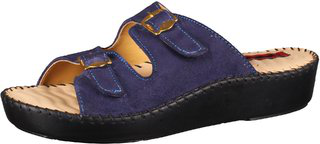

In [42]:
Image_Location_12 = np.random.randint(1,301)
path = 'C:/Users/Bhavesh/Desktop/Fashion Classifier/Test/Test All/test ({}).jpg'.format(Image_Location_12)
img = Image.open(path)
img

In [43]:
Fashion_Classifer(Image_Location_12)

The image uploaded is a Womens footwear


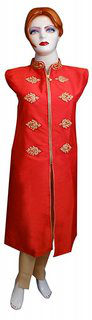

In [44]:
Image_Location_13 = np.random.randint(1,301)
path = 'C:/Users/Bhavesh/Desktop/Fashion Classifier/Test/Test All/test ({}).jpg'.format(Image_Location_13)
img = Image.open(path)
img

In [45]:
Fashion_Classifer(Image_Location_13)

The image uploaded is a Womens clothing


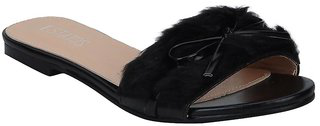

In [46]:
Image_Location_14 = np.random.randint(1,301)
path = 'C:/Users/Bhavesh/Desktop/Fashion Classifier/Test/Test All/test ({}).jpg'.format(Image_Location_14)
img = Image.open(path)
img

In [47]:
Fashion_Classifer(Image_Location_14)

The image uploaded is a Eyeglass


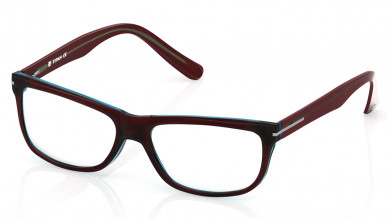

In [48]:
Image_Location_15 = np.random.randint(1,301)
path = 'C:/Users/Bhavesh/Desktop/Fashion Classifier/Test/Test All/test ({}).jpg'.format(Image_Location_15)
img = Image.open(path)
img

In [49]:
Fashion_Classifer(Image_Location_15)

The image uploaded is a Eyeglass


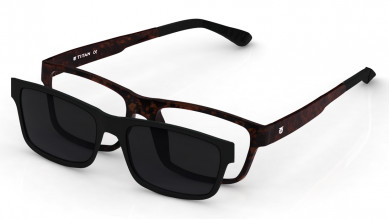

In [50]:
Image_Location_16 = np.random.randint(1,301)
path = 'C:/Users/Bhavesh/Desktop/Fashion Classifier/Test/Test All/test ({}).jpg'.format(Image_Location_16)
img = Image.open(path)
img

In [51]:
Fashion_Classifer(Image_Location_16)

The image uploaded is a Eyeglass


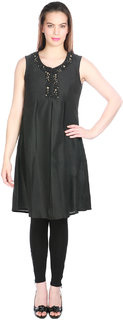

In [52]:
Image_Location_17 = np.random.randint(1,301)
path = 'C:/Users/Bhavesh/Desktop/Fashion Classifier/Test/Test All/test ({}).jpg'.format(Image_Location_17)
img = Image.open(path)
img

In [53]:
Fashion_Classifer(Image_Location_17)

The image uploaded is a Womens clothing


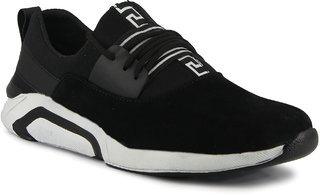

In [54]:
Image_Location_18 = np.random.randint(1,301)
path = 'C:/Users/Bhavesh/Desktop/Fashion Classifier/Test/Test All/test ({}).jpg'.format(Image_Location_18)
img = Image.open(path)
img

In [55]:
Fashion_Classifer(Image_Location_18)

The image uploaded is a Sneaker


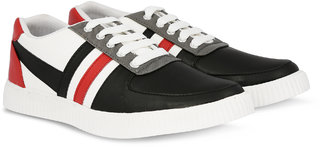

In [56]:
Image_Location_19 = np.random.randint(1,301)
path = 'C:/Users/Bhavesh/Desktop/Fashion Classifier/Test/Test All/test ({}).jpg'.format(Image_Location_19)
img = Image.open(path)
img

In [57]:
Fashion_Classifer(Image_Location_19)

The image uploaded is a Eyeglass


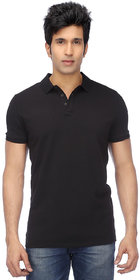

In [58]:
Image_Location_20 = np.random.randint(1,301)
path = 'C:/Users/Bhavesh/Desktop/Fashion Classifier/Test/Test All/test ({}).jpg'.format(Image_Location_20)
img = Image.open(path)
img

In [59]:
Fashion_Classifer(Image_Location_20)

The image uploaded is a T_Shirts


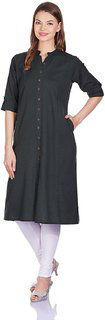

In [60]:
Image_Location_21 = np.random.randint(1,301)
path = 'C:/Users/Bhavesh/Desktop/Fashion Classifier/Test/Test All/test ({}).jpg'.format(Image_Location_21)
img = Image.open(path)
img

In [61]:
Fashion_Classifer(Image_Location_21)

The image uploaded is a Womens clothing


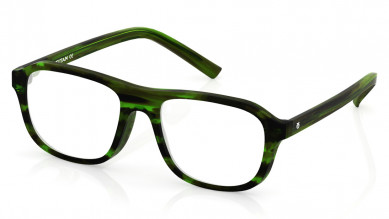

In [62]:
Image_Location_22 = np.random.randint(1,301)
path = 'C:/Users/Bhavesh/Desktop/Fashion Classifier/Test/Test All/test ({}).jpg'.format(Image_Location_22)
img = Image.open(path)
img

In [63]:
Fashion_Classifer(Image_Location_22)

The image uploaded is a Eyeglass


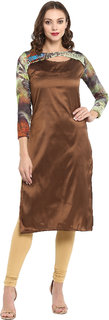

In [64]:
Image_Location_23 = np.random.randint(1,301)
path = 'C:/Users/Bhavesh/Desktop/Fashion Classifier/Test/Test All/test ({}).jpg'.format(Image_Location_23)
img = Image.open(path)
img

In [65]:
Fashion_Classifer(Image_Location_23)

The image uploaded is a Womens clothing


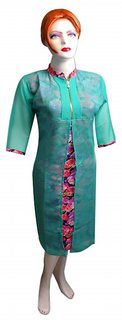

In [66]:
Image_Location_24 = np.random.randint(1,301)
path = 'C:/Users/Bhavesh/Desktop/Fashion Classifier/Test/Test All/test ({}).jpg'.format(Image_Location_24)
img = Image.open(path)
img

In [67]:
Fashion_Classifer(Image_Location_24)

The image uploaded is a T_Shirts


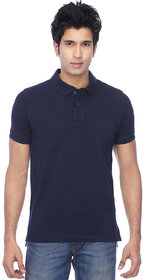

In [68]:
Image_Location_25 = np.random.randint(1,301)
path = 'C:/Users/Bhavesh/Desktop/Fashion Classifier/Test/Test All/test ({}).jpg'.format(Image_Location_25)
img = Image.open(path)
img

In [69]:
Fashion_Classifer(Image_Location_25)

The image uploaded is a T_Shirts


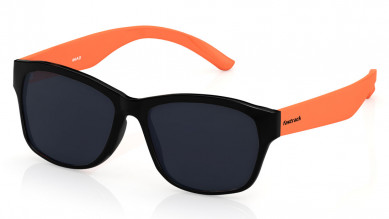

In [70]:
Image_Location_26 = np.random.randint(1,301)
path = 'C:/Users/Bhavesh/Desktop/Fashion Classifier/Test/Test All/test ({}).jpg'.format(Image_Location_26)
img = Image.open(path)
img

In [71]:
Fashion_Classifer(Image_Location_26)

The image uploaded is a Eyeglass


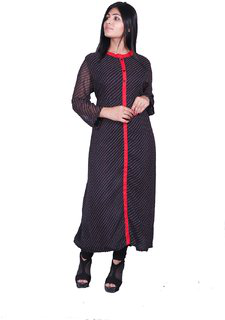

In [72]:
Image_Location_27 = np.random.randint(1,301)
path = 'C:/Users/Bhavesh/Desktop/Fashion Classifier/Test/Test All/test ({}).jpg'.format(Image_Location_27)
img = Image.open(path)
img

In [73]:
Fashion_Classifer(Image_Location_27)

The image uploaded is a Womens clothing


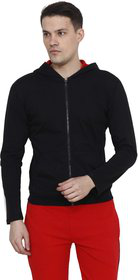

In [74]:
Image_Location_28 = np.random.randint(1,301)
path = 'C:/Users/Bhavesh/Desktop/Fashion Classifier/Test/Test All/test ({}).jpg'.format(Image_Location_28)
img = Image.open(path)
img

In [75]:
Fashion_Classifer(Image_Location_28)

The image uploaded is a T_Shirts


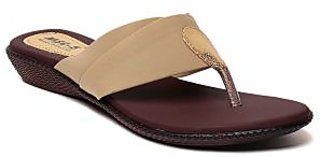

In [76]:
Image_Location_29 = np.random.randint(1,301)
path = 'C:/Users/Bhavesh/Desktop/Fashion Classifier/Test/Test All/test ({}).jpg'.format(Image_Location_29)
img = Image.open(path)
img

In [77]:
Fashion_Classifer(Image_Location_29)

The image uploaded is a Womens footwear


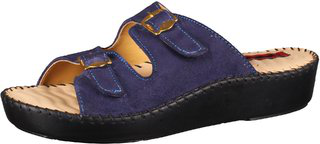

In [78]:
Image_Location_30 = np.random.randint(1,301)
path = 'C:/Users/Bhavesh/Desktop/Fashion Classifier/Test/Test All/test ({}).jpg'.format(Image_Location_30)
img = Image.open(path)
img

In [79]:
Fashion_Classifer(Image_Location_30)

The image uploaded is a Womens footwear
